### Assignment 6

### Name: Saloni Mishra

### Date: October 18, 2020

## BIRCH Clustering

#### Birch is balanced iterative reducing and clustering using hierarchies, this is an unsupervised  used to perform hierarchical clustering. BIRCH can only deal with metric attributes. A metric attribute is one whose values can be represented by explicit coordinates in an Euclidean space (no categorical variables).

### BIRCH CLUSTERING ALGORITHM
#### Phase 1: Build the CF(Clustering Feature) Tree. Load the data into memory by building a cluster-feature tree.
#### Phase 2: Global Clustering. Apply an existing clustering algorithm on the leaves of the CF tree. Optionally, refine these clusters.

#### CLUSTER FEATURE
#### A CF is a set of three summary statistics that represent a set of data points in a single cluster. These statistics are as follows:
* Count. Number of data values in the cluster.
* Linear Sum. Sum the individual coordinates. This is a measure of the location of the cluster.
* Squared Sum. Sum the squared coordinates. This is a measure of the spread of the cluster.

#### CLUSTER FEATURE TREE PARAMETERS
* Branching Factor B. B determines the maximum children allowed for a non-leaf node.
* Threshold T. T is an upper limit to the radius of a cluster in a leaf node.
* Number of Entries in a Leaf Node L.

#### Cons

* We can only use numeric variables.
* Order in which data is fed also affect the clustering.

### Loading Data set

In [243]:
import pandas as pd
df=pd.read_csv("loan.csv")
df.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450
1,F,0.0,403,500,225
2,F,0.0,408,1000,450
3,F,0.0,408,2000,900
4,F,0.0,411,5000,2250


## Data Preprocessing & EDA

### After basic understanding of the data. I did the EDA. As the author of the book suggested that highly correlated variables should not be considered together for the clustering, as it may affect the result. Therefore, as we can see in the heatmap below that variable Request Amount and Interest is highly correlated, so I will take Request AMount for further analysis. Also as in the BIRCH we can not consider categorical variables therefore variable Approval will not be used further.

In [140]:
print(df.shape)
df.describe()

(150302, 5)


,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
count,150302.000000,150302.000000,150302.000000,150302.000000
mean,0.183538,672.023266,13427.080145,6042.186065
std,0.137226,69.129157,9468.345958,4260.755681
min,0.000000,371.000000,500.000000,225.000000
25%,0.090000,647.000000,6000.000000,2700.000000
50%,0.160000,684.000000,11000.000000,4950.000000
75%,0.240000,714.000000,19000.000000,8550.000000
max,1.030000,869.000000,44000.000000,19800.000000


In [141]:
df.isna().sum()

Approval                0
Debt-to-Income Ratio    0
FICO Score              0
Request Amount          0
Interest                0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150302 entries, 0 to 150301
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Approval              150302 non-null  object 
 1   Debt-to-Income Ratio  150302 non-null  float64
 2   FICO Score            150302 non-null  int64  
 3   Request Amount        150302 non-null  int64  
 4   Interest              150302 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 5.7+ MB


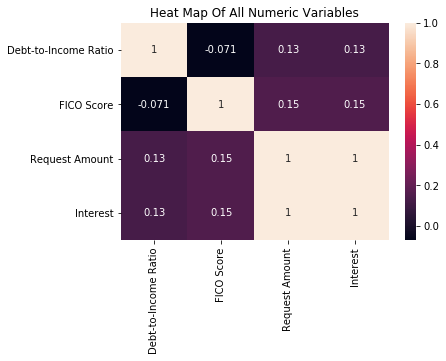

In [25]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True).set(title="Heat Map Of All Numeric Variables")

plt.show()

c:\users\salon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


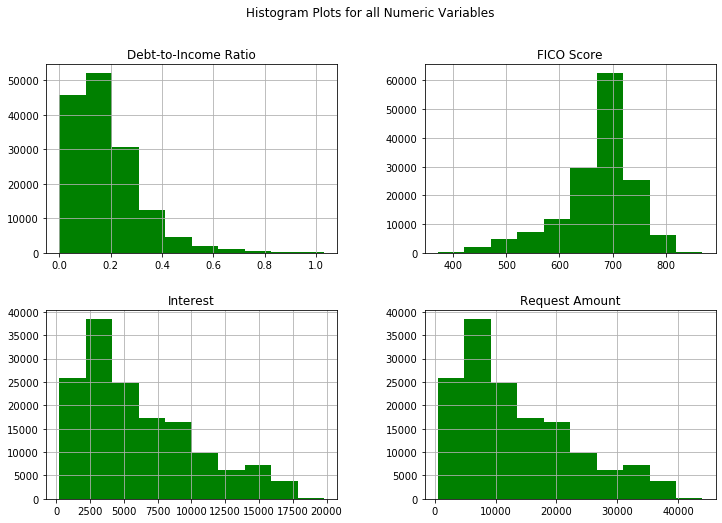

In [143]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
df.hist(ax=ax, color='g')

fig.suptitle("Histogram Plots for all Numeric Variables")
plt.show();

## Silhouette Analysis

### As in jupyter notebook, the analysis was not running, I used Colab for Silhouette analysis and graph for different clusters(attached in the last page). Here I just calculated Sillohoutte values. For cluster 2, 0.515, cluster 3, 4 and 5 is 0.3, so suggesting cluster 2 would be optimum.

In [249]:
X=df.iloc[:,1:4].values
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
X = scaler.fit_transform(X)
model = Birch( n_clusters = 2, threshold = 1) 
labels = model.fit_predict(X)


In [173]:
centroids = model.n_clusters
# Get silhouette samples
silhouette_vals = silhouette_samples(X, labels)

In [183]:
X=df.iloc[:,1:4].values
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
X = scaler.fit_transform(X)
model = Birch( n_clusters = 5, threshold = 1) 
labels = model.fit_predict(X)
centroids = model.n_clusters
# Get silhouette samples
silhouette_vals = silhouette_samples(X, labels)

In [184]:
print(np.mean(silhouette_vals)) # cluster 5

0.2991444830932493


In [182]:
print(np.mean(silhouette_vals)) # cluster 4

0.30157049536617314


In [180]:
print(np.mean(silhouette_vals)) # cluster 3

0.3002689482345304


In [177]:
np.mean(silhouette_vals) #cluster 2

0.5149921040328514

In [258]:
X = scaler.fit_transform(X)
model = Birch( n_clusters = 5, threshold = 1) 
labels = model.fit_predict(X)

### davies_bouldin_score(db_score)

#### The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering. So from this, we can understand that lesser db_score is better suggesting that below cluster 2 has lowest value and optimal number of clusters.

In [250]:
db2=sklearn.metrics.davies_bouldin_score(X, labels)


In [255]:
db3=sklearn.metrics.davies_bouldin_score(X, labels)

In [257]:
db4=sklearn.metrics.davies_bouldin_score(X, labels)

In [259]:
db5=sklearn.metrics.davies_bouldin_score(X, labels)

In [261]:
print(db2, db3, db4, db5)

0.7870953813264758 1.5582592797575614 1.2640056912051119 1.2074070995789548


###  BIRCH Clustering

#### For the analysis,  I took whole data into X with 3 variables as discussed above.

#### In the below analysis, I took default value for branching factor. From Sillhoutte analysis and davies_bouldin_score , I am using number of cluster as 2. To better understand plot, I am taking 2 variables at a time, from below plots, we can understand that FICO Score is not having affect but when request amount is more than 25000 all the customers are in different cluster suggesting bank should be thoughtful before approving loan to them. Same results can inferred from debt to income ratio vs request amount. But nothing can be understand by FICO Score vs debt to income.

In [185]:
X=df.iloc[:,1:4].values

In [186]:
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.cluster import Birch 
model = Birch( branching_factor = 50, n_clusters = 2, threshold = 5) 
model.fit(X) 
# Predict the same data 
pred = model.predict(X) 

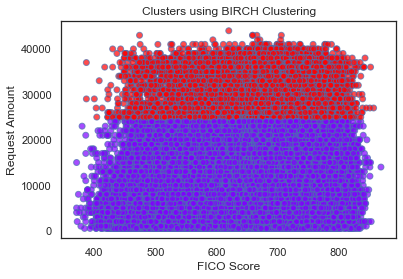

In [211]:
# Creating a scatter plot 
plt.scatter(X[:, 1], X[:,2], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
plt.title('Clusters using BIRCH Clustering')
plt.xlabel('FICO Score')
plt.ylabel('Request Amount')
plt.show()

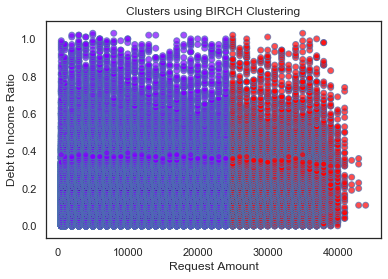

In [213]:
# Creating a scatter plot 
plt.scatter(X[:, 2], X[:,0], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
plt.title('Clusters using BIRCH Clustering')
plt.xlabel('Request Amount')
plt.ylabel('Debt to Income Ratio')
plt.show()

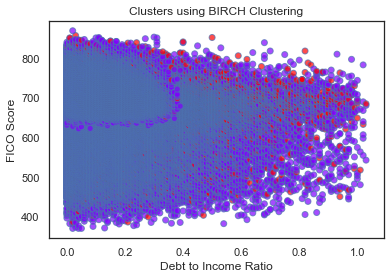

In [214]:
# Creating a scatter plot 
plt.scatter(X[:, 0], X[:,1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
plt.title('Clusters using BIRCH Clustering')
plt.ylabel('FICO Score')
plt.xlabel('Debt to Income Ratio')
plt.show()

### As in the BIRCH, sequence affects the clustering, therefore I sorted the Request Amount variable, as below. After sorting I applied BIRCH Clustering and we can understand that FICO Score is not having affect but when request amount is more than 30000 all the customers are in different cluster suggesting bank should be thoughtful before approving loan to them. Same results can inferred from debt to income ratio vs request amount. But nothing meaningful can be inferred by FICO Score vs debt to income.

In [219]:
df2=df.sort_values(by=['Request Amount'])

In [220]:
df2.head()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
22385,F,0.11,598,500,225
32992,F,0.16,684,500,225
79391,T,0.03,687,500,225
53538,F,0.29,705,500,225
79345,T,0.03,684,500,225


In [221]:
X=df2.iloc[:,1:4].values

In [222]:
# Creating the BIRCH clustering model 
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.cluster import Birch 
model1 = Birch( branching_factor = 50, n_clusters = 2, threshold = 5) 

In [223]:
model1.fit(X) 
# Predict the same data 
pred = model1.predict(X) 

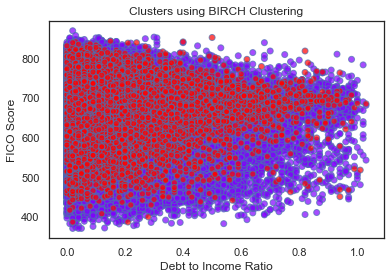

In [224]:
# Creating a scatter plot 
plt.scatter(X[:, 0], X[:,1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
plt.title('Clusters using BIRCH Clustering')
plt.ylabel('FICO Score')
plt.xlabel('Debt to Income Ratio')
plt.show()

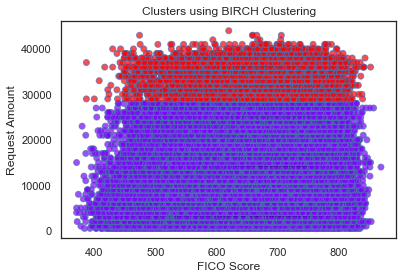

In [226]:
# Creating a scatter plot 
plt.scatter(X[:, 1], X[:,2], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
plt.title('Clusters using BIRCH Clustering')
plt.xlabel('FICO Score')
plt.ylabel('Request Amount')
plt.show()

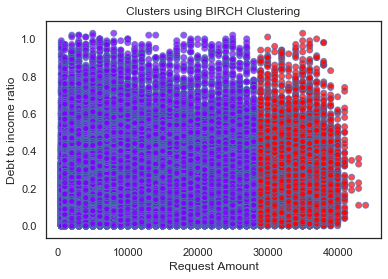

In [227]:
# Creating a scatter plot 
plt.scatter(X[:, 2], X[:,0], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b') 
plt.title('Clusters using BIRCH Clustering')
plt.ylabel('Debt to income ratio')
plt.xlabel('Request Amount')
plt.show()

### BIRCH Clustering from Standarized Data

#### I also explored further by standardizing the data. In this as earlier, I was not getting anything understandable from debt-to-income ratio therefore, I took only two variables for further analysis. Also, I took number of clusters 2 and 5 for below analysis. In cluster 5, we can see that in the middle of FICO score, clustering happens dividing in 5 groups. Customers with low FICO score and low request amount and high request amount. Customers with Good to excellent FICO score and low, medium and high request amount. In my opinion, clusters 3 and 5 with high request amount are the customers bank should be cautious before giving loan.

In [228]:
X=df.iloc[:,2:4].values
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
X = scaler.fit_transform(X)

In [240]:
# Fit the data (Training) 
# Creating the BIRCH clustering model 
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.cluster import Birch 
model = Birch( branching_factor = 50, n_clusters = 5, threshold = 1) 
model.fit(X) 
# Predict the same data 
pred = model.predict(X)

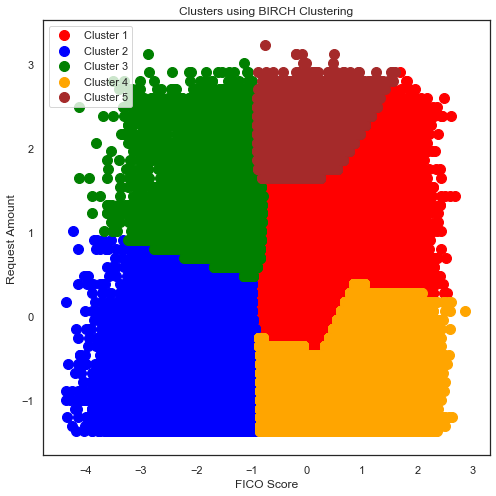

In [242]:
# Creating a scatter plot 
plt.figure(figsize=(8,8))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')

plt.title('Clusters using BIRCH Clustering')
plt.xlabel('FICO Score')
plt.ylabel('Request Amount')
plt.legend()
plt.show()

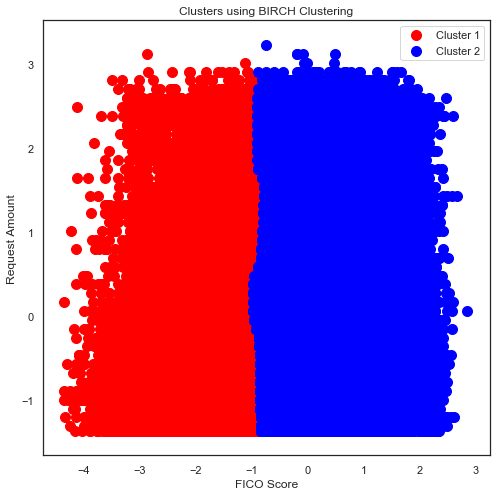

In [236]:
plt.figure(figsize=(8,8))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.title('Clusters using BIRCH Clustering')
plt.xlabel('FICO Score')
plt.ylabel('Request Amount')
plt.legend()
plt.show()

In [113]:
X=df.iloc[:,2:4].values

## Comparison between KMean and BIRCH Clustering

### From the elbow method, I got 3 will be better for clustering but I also tried for 2. Below we can see that from clustering 2, same pattern as BIRCH is seen although the request amount is more low now, i.e., 17000. In clustering 3, again FICO score is not playing role in clustering the data but clusters are 0 to 12k, 12 to 24k and higher. In my opinion the higher one is for the customers bank should be most cautious. 

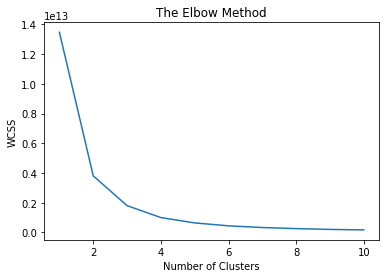

In [114]:
from sklearn. cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)

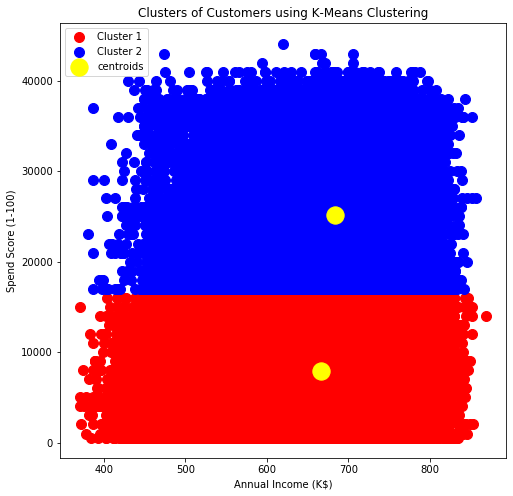

In [123]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centroids')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

In [124]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)

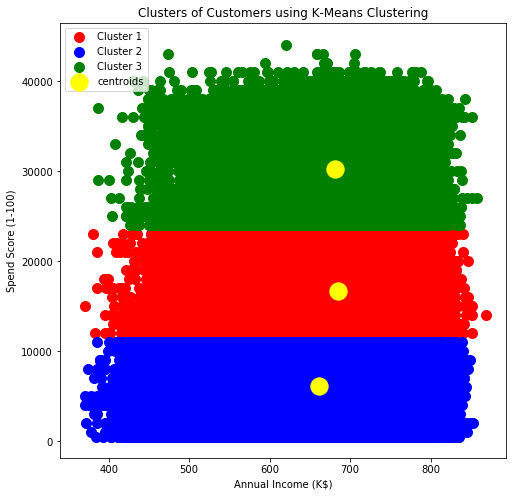

In [125]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='centroids')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

## CONCLUSION

### BIRCH is more for dimensionality reduction instead of clustering as it creates CF tree and then one can use different clustering algorithm to get results from it. Although normally agglomerative clustering has been used. 

### To get optimum number of clusters, I tried Sillhoutte analysis and found that sillhoutte score for cluster 2 is 0.515 and for cluster 3, 4 and 5 is 0.3, so suggesting cluster 2 would be optimum moreover davies_bouldin_score is also lowest for cluster 2 indicating optimum choice. Then I aplied BIRCH with three variables and saw that FICO Score is not having affect on clustering but when request amount is more than 25000 all the customers are in different cluster suggesting bank should be thoughtful before approving loan to them. Same results can inferred from debt to income ratio vs request amount. But nothing can be understand by FICO Score vs debt to income.

### I also explored further by standardizing the data. In this as earlier, I was not getting anything understandable from debt-to-income ratio therefore for further analysis I took two variables i.e., 'Request Balance' and 'FICO Score'.Also, I took number of clusters 2 and 5 for below analysis. In cluster 5, we can see that in the middle of FICO score, clustering happens dividing in 5 groups. Customers with low FICO score and low request amount and high request amount. Customers with Good to excellent FICO score and low, medium and high request amount. In my opinion, clusters 3 and 5 with high request amount are the customers bank should be cautious before giving loan.

### After that I compared the results with KMeans clustering and found that in taking cluster two although pattern is same of clustering but value of request amount is 16k almost.